# Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
import IPython.display as ipd

# Envelopes | Windowing

In [2]:
x, sr = lr.load('piano.mp3')
ipd.display(ipd.Audio(x, rate=sr))

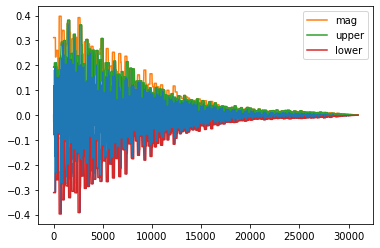

In [34]:
def calc_env(x, win_len=200, hop_size=90):

    x_len = np.shape(x)[0]
    num_wins = int((x_len - win_len) / hop_size)
    # print(x_len, num_wins)
    
    mag_env = np.array([])
    up_env = np.array([])
    low_env = np.array([])

    for i in range(num_wins):
        start = i * hop_size
        stop = start + win_len
        # print(start, stop)
        win = x[start : stop]
        
        mag = np.max(np.abs(win))
        mag_env = np.append(mag_env, mag)

        up = np.max(win)
        up_env = np.append(up_env, up)

        low = np.min(win)
        low_env = np.append(low_env, low)

    return mag_env, up_env, low_env

envs = calc_env(x, 200, 10)

plt.plot(x)
t_env = np.linspace(0, np.shape(x)[0], np.shape(env[0])[0])
plt.plot(t_env, envs[0], label='mag')
plt.plot(t_env, envs[1], label='upper')
plt.plot(t_env, envs[2], label='lower')
plt.legend()